In [1]:
username = "Alex"
env = "integrate"
pathtorepo = "C:\\Users\\" *username *  "\\Desktop\\"
using Pkg
Pkg.activate(pathtorepo * "dynamical-systems\\env\\" * env * "\\")
include(pathtorepo * "dynamical-systems\\system.jl");

  Activating project at `C:\Users\Alex\Desktop\dynamical-systems\env\integrate`

In [2]:
using StaticArrays, DifferentialEquations, DynamicalSystems, LinearAlgebra
using CairoMakie, GLMakie

In [3]:
function get_eigen(u, p, jac_system, t = 0.0)
    Ju = jac_system(u, p, t)
    ei_u = eigen(Ju)
    return (fp = u, ei = ei_u)
end
function show_fp_eigen(data)
    println("fixed point: $(data.fp)")
    println("---------------------------------------------------")
    println("eigenvalues: $(data.ei.values)")
    println("---------------------------------------------------")
    println("eigenvectors:")
    show(stdout, "text/plain", data.ei.vectors); println()
    println("---------------------------------------------------"); println()
end
function shift_vec(eifp, col; ϵ = 1e-6, sign_ = +)
    sign_(eifp.fp, real(eifp.ei.vectors[:, 1]) * ϵ)
end;

In [4]:
t = 500.0; tt = 600.0; tstep = 0.001
trange = range(0.0, t, step = tstep)
integ_set = (alg = RK4(), adaptive = false, dt = tstep)

E = interval(-40, 40); x = interval(-10, 10); y = interval(-10, 10)
box = IntervalBox(E, x, y);

In [5]:
const τ = 0.013;  const τD = 0.07993;  const τy = 3.3;  const J = 3.07;  const β = 0.300
const xthr = 0.75; const ythr = 0.4
const α = 1.58; const ΔU0 = 0.305;
I0, U0 = -0.9, 0.35
p = SA[α, τ, τD, τy, J, xthr, ythr, U0, ΔU0, β, I0];

In [6]:
u0 = SA[7.485044731286254, 0.771932479798953, 0.5235934863993938]
ds = CoupledODEs(TM, u0, p, diffeq = integ_set)

3-dimensional CoupledODEs
 deterministic: true
 discrete time: false
 in-place:      false
 dynamic rule:  TM
 ODE solver:    RK4
 ODE kwargs:    (adaptive = false, dt = 0.001)
 parameters:    [1.58, 0.013, 0.07993, 3.3, 3.07, 0.75, 0.4, 0.35, 0.305, 0.3, -0.9]
 time:          0.0
 state:         [7.485044731286254, 0.771932479798953, 0.5235934863993938]


In [7]:
fp, _, _ = fixedpoints(ds, box, jacob_TM_)
println("count of fixed points: $(length(fp))");

count of fixed points: 1


In [8]:
eifp1 = get_eigen(fp[1], p, jacob_TM_);

In [9]:
show_fp_eigen(eifp1)

fixed point: [9.482137674960269, 0.7297943778785994, 0.3963214367962451]
---------------------------------------------------
eigenvalues: ComplexF64[-9.826798038416442 + 0.0im, -0.27917277416044683 - 17.411279671762305im, -0.27917277416044683 + 17.411279671762305im]
---------------------------------------------------
eigenvectors:


3×3 SMatrix{3, 3

, ComplexF64, 9} with indices SOneTo(3)×SOneTo(3):
   0.99429+0.0im     -0.999876-0.0im            -0.999876+0.0im
 -0.105508+0.0im     0.0116305+0.0105135im      0.0116305-0.0105135im


 0.0159572+0.0im  -0.000868438+0.00096335im  -0.000868438-0.00096335im
---------------------------------------------------



In [11]:
tr, trange = trajectory(ds, 500, Δt = tstep)

(3-dimensional StateSpaceSet{Float64} with 500001 points, 0.0:0.001:500.0)

In [13]:
lb_size = 35; tck_size = 30; dis = 60;

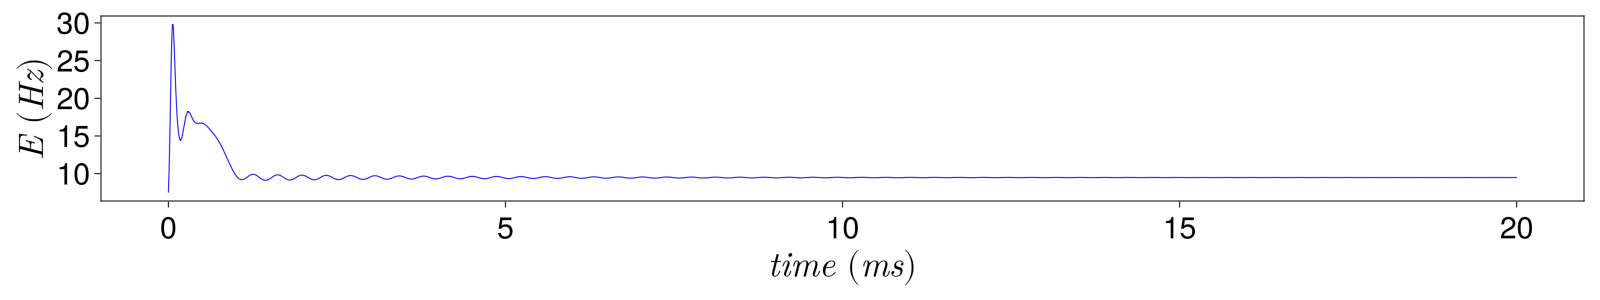

In [20]:
ts, tf = 1, 20000
f = Figure(resolution = (1600, 300))
axis = Axis(f[1, 1], xlabel = L"$time$ $(ms)$", ylabel = L"$E$ $(Hz)$",
            xlabelsize = lb_size, ylabelsize = lb_size,
            xticklabelsize = tck_size, yticklabelsize = tck_size,
            xgridvisible = false, ygridvisible = false)

lines!(axis, trange[ts:tf], tr[ts:tf, 1],  linewidth = 1.0, color = :blue)
f

In [21]:
tsb, tfb = 1, 20000

idx, idy, idz = 2, 3, 1
f = Figure(resolution = (900, 600))
ax = LScene(f[1, 1], show_axis = true)
scale!(ax.scene, 50, 50, 1)

lines!(ax, tr[ts:tf, idx], tr[ts:tf, idy], tr[ts:tf, idz],
        linewidth = 1.0, linestyle = :solid, color = :blue)

for point in fp
        scatter!(ax, point[2], point[3], point[1], markersize = 8, color = :orange)
end

display(GLMakie.Screen(), f);